In [1]:
#Read customers' data with Pandas
import pandas as pd

customers = pd.read_csv('customers.csv')

In [2]:
# Read the top 5 records

customers.head()

,CustomerID,Age,Income ($),PurchaseCount,Country,LastPurchaseDate,PreferredDevice,IsSubscribed,CreditScore
0,C0001,NaN,168501.0,NaN,UK,2024-06-30,Desktop,NaN,617.0
1,C0002,32.0,67333.0,24.0,India,2025-01-03,Desktop,1.0,410.0
2,C0003,38.0,NaN,37.0,Germany,NaN,Tablet,1.0,306.0
3,C0004,36.0,NaN,57.0,NaN,NaN,Desktop,1.0,NaN
4,C0005,28.0,74045.0,31.0,USA,2024-06-27,Desktop,1.0,613.0


In [3]:
# Check which columns contains Missing Data
customers.isnull().any()

CustomerID          False
Age                  True
Income ($)           True
PurchaseCount        True
Country              True
LastPurchaseDate     True
PreferredDevice      True
IsSubscribed         True
CreditScore          True
dtype: bool

In [4]:
# Calculate missing data statistics in Percentage
missing_counts = customers.isnull().sum()  
missing_percent = (missing_counts / len(customers)) * 100 

missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage (%)": missing_percent.round(2)
})

missing_summary = missing_summary[missing_summary["Missing Count"] > 0]
missing_summary

,Missing Count,Missing Percentage (%)
Age,47,34.31
Income ($),48,35.04
PurchaseCount,32,23.36
Country,30,21.90
LastPurchaseDate,32,23.36
PreferredDevice,42,30.66
IsSubscribed,39,28.47
CreditScore,41,29.93


In [5]:
#Listwise Deletion: Remove all rows with any missing values
customers_listwise = customers.dropna()
customers_listwise.head()

,CustomerID,Age,Income ($),PurchaseCount,Country,LastPurchaseDate,PreferredDevice,IsSubscribed,CreditScore
1,C0002,32.0,67333.0,24.0,India,2025-01-03,Desktop,1.0,410.0
4,C0005,28.0,74045.0,31.0,USA,2024-06-27,Desktop,1.0,613.0
5,C0006,53.0,190862.0,46.0,India,2024-07-26,Desktop,1.0,814.0
22,C0023,37.0,55777.0,26.0,UK,2024-05-10,Mobile,1.0,451.0
24,C0025,25.0,178823.0,83.0,UK,2024-11-20,Mobile,1.0,811.0


In [6]:
#Perform Listwise Deletion with any missing values, but with threshold
customers_listwise_thresh = customers.dropna(thresh =7)
customers_listwise_thresh.head()

,CustomerID,Age,Income ($),PurchaseCount,Country,LastPurchaseDate,PreferredDevice,IsSubscribed,CreditScore
1,C0002,32.0,67333.0,24.0,India,2025-01-03,Desktop,1.0,410.0
2,C0003,38.0,NaN,37.0,Germany,NaN,Tablet,1.0,306.0
4,C0005,28.0,74045.0,31.0,USA,2024-06-27,Desktop,1.0,613.0
5,C0006,53.0,190862.0,46.0,India,2024-07-26,Desktop,1.0,814.0
8,C0009,47.0,129616.0,19.0,USA,2024-10-19,NaN,1.0,836.0


In [7]:
#Perform Column Deletion with non-missing values threshold
customers_column_deletion_thresh = customers.dropna(axis=1, thresh =100)
customers_column_deletion_thresh.head()

,CustomerID,PurchaseCount,Country,LastPurchaseDate
0,C0001,NaN,UK,2024-06-30
1,C0002,24.0,India,2025-01-03
2,C0003,37.0,Germany,NaN
3,C0004,57.0,NaN,NaN
4,C0005,31.0,USA,2024-06-27


In [8]:
# Fill in the data manually for a known customers age
customers_manual = customers.copy()
customers_manual.loc[customers_manual['CustomerID']=='C0001', 'Age'] = 34

In [9]:
#Filling up the missing values with Central Tendency measurement
customers_ct = customers.copy()

#For Numeric columns using either Mean or Median
customers_ct['Age'] = customers_ct['Age'].fillna(customers_ct['Age'].mean())
customers_ct['PurchaseCount'] = customers_ct['PurchaseCount'].fillna(customers_ct['PurchaseCount'].median())

# For Categorical or date‐like columns
customers_ct['Country'] = customers_ct['Country'].fillna(customers_ct['Country'].mode()[0])

customers_ct.head()

,CustomerID,Age,Income ($),PurchaseCount,Country,LastPurchaseDate,PreferredDevice,IsSubscribed,CreditScore
0,C0001,40.444444,168501.0,48.0,UK,2024-06-30,Desktop,NaN,617.0
1,C0002,32.000000,67333.0,24.0,India,2025-01-03,Desktop,1.0,410.0
2,C0003,38.000000,NaN,37.0,Germany,NaN,Tablet,1.0,306.0
3,C0004,36.000000,NaN,57.0,Germany,NaN,Desktop,1.0,NaN
4,C0005,28.000000,74045.0,31.0,USA,2024-06-27,Desktop,1.0,613.0


In [10]:
#Filling up the missing values with Central Tendency measurement and based on group
customers_grp = customers.copy()

#fill missing by the *mean income* of that customer’s PreferredDevice
customers_grp['Income ($)'] = customers_grp['Income ($)'].fillna(customers_grp.groupby('PreferredDevice')['Income ($)'].transform('mean'))

# CreditScore: fill missing by the *median credit score* of subscribed vs unsubscribed
customers_grp['CreditScore'] = customers_grp['CreditScore'].fillna(customers_grp.groupby('IsSubscribed')['CreditScore'].transform('median'))

customers_grp.head()                                                               

,CustomerID,Age,Income ($),PurchaseCount,Country,LastPurchaseDate,PreferredDevice,IsSubscribed,CreditScore
0,C0001,NaN,168501.000000,NaN,UK,2024-06-30,Desktop,NaN,617.0
1,C0002,32.0,67333.000000,24.0,India,2025-01-03,Desktop,1.0,410.0
2,C0003,38.0,111211.666667,37.0,Germany,NaN,Tablet,1.0,306.0
3,C0004,36.0,126684.583333,57.0,NaN,NaN,Desktop,1.0,600.5
4,C0005,28.0,74045.000000,31.0,USA,2024-06-27,Desktop,1.0,613.0


In [11]:
# Calculate Income feature with Z-Score for outlier detection
from scipy import stats
import numpy as np

income_data = customers['Income ($)'].dropna().reset_index(drop=True)

# Introduce outliers (extreme values)
income_with_outliers = pd.concat([
    income_data,
    pd.Series([350000, -120000])
], ignore_index=True)

# Calculate Z-Scores and the outlier detection
z_scores = np.abs(stats.zscore(income_with_outliers))
threshold = 3
outliers = income_with_outliers[(z_scores > threshold)]

print(f"Mean Income: {income_with_outliers.mean():.2f}")
print(f"Std Deviation: {income_with_outliers.std():.2f}")
print("\nDetected Outliers:")
print(outliers.to_string(index=False))

Mean Income: 113654.90
Std Deviation: 65106.54

Detected Outliers:
 350000.0
-120000.0


In [12]:
#Calculate Income feature with IQR for outlier detection

Q1 = income_with_outliers.quantile(0.25)
Q3 = income_with_outliers.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = income_with_outliers[
    (income_with_outliers < lower_bound) | 
    (income_with_outliers > upper_bound)
]

# Display results
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print("\nDetected Outliers:")
print(outliers.to_string(index=False))

IQR: 105645.50
Lower Bound: -101000.75
Upper Bound: 321581.25

Detected Outliers:
 350000.0
-120000.0


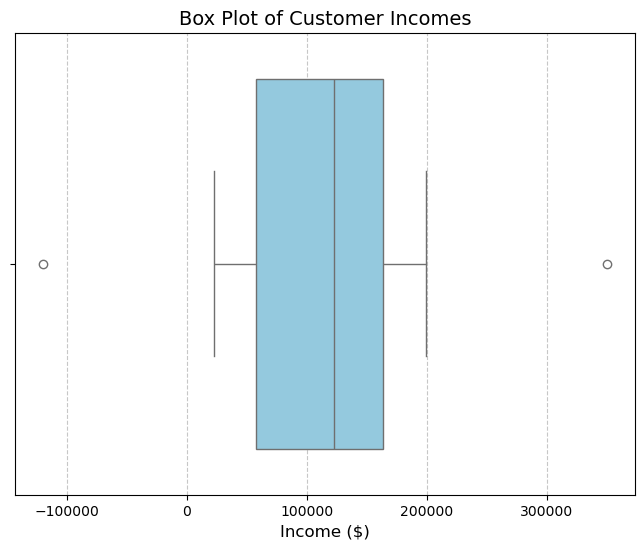

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=income_with_outliers, color='skyblue')
plt.title('Box Plot of Customer Incomes', fontsize=14)
plt.xlabel('Income ($)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

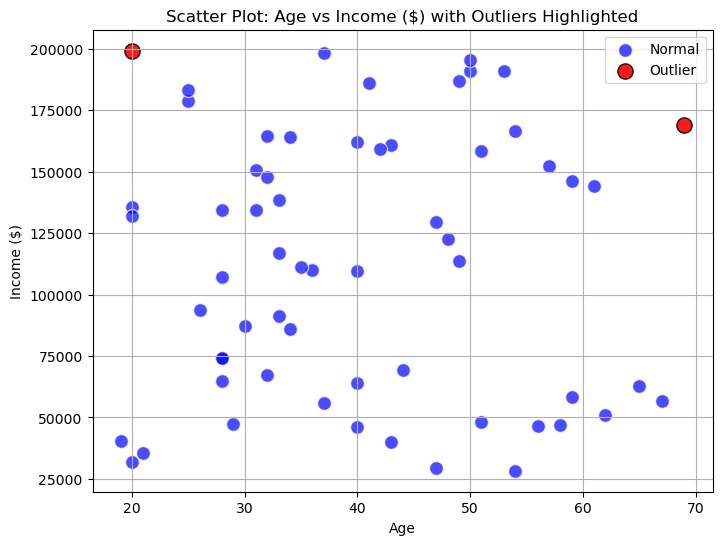

In [14]:
# Outlier detection with Scatter Plot

x = customers['Age']
y = customers['Income ($)']

# Define a simple outlier rule for visualization
outlier_mask = ((x < 25) & (y > 150000)) | ((x > 60) & (y > 150000))

# Plot with color based on mask
plt.figure(figsize=(8, 6))
plt.scatter(x[~outlier_mask], y[~outlier_mask], c='blue', label='Normal', alpha=0.7, edgecolors='w', s=100)
plt.scatter(x[outlier_mask], y[outlier_mask], c='red', label='Outlier', alpha=0.9, edgecolors='k', s=120)
plt.title('Scatter Plot: Age vs Income ($) with Outliers Highlighted')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
from scipy.spatial import distance
from scipy.stats import chi2

# Select multiple features for multivariate analysis
cols = ['Age', 'Income ($)', 'CreditScore']
customers_multivariate = customers[cols].dropna()

# Artificially add some synthetic outliers
# Example: extreme income and credit scores
synthetic_outliers = pd.DataFrame({
    'Age': [20, 70],
    'Income ($)': [500000, 600000], 
    'CreditScore': [200, 950] 
})

customers_multivariate = pd.concat([customers_multivariate, synthetic_outliers], ignore_index=True)

# Step 1: Calculate the mean vector and covariance matrix
mean_vector = customers_multivariate.mean()
cov_matrix = np.cov(customers_multivariate.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Step 2: Compute Mahalanobis distance for each observation
mahalanobis_distances = customers_multivariate.apply(lambda row: distance.mahalanobis(row, mean_vector, inv_cov_matrix), axis=1)

# Step 3: Set a threshold using Chi-Square distribution
alpha = 0.975  # 97.5% confidence
df_degrees = len(cols)  # degrees of freedom = number of features
threshold = np.sqrt(chi2.ppf(alpha, df_degrees))

# Step 4: Identify outliers
outliers = customers_multivariate[mahalanobis_distances > threshold]

# Step 5: Results
print(f"Threshold Mahalanobis distance: {threshold:.2f}")
print(f"Number of outliers detected: {outliers.shape[0]}")
print(outliers)

Threshold Mahalanobis distance: 3.06
Number of outliers detected: 2
     Age  Income ($)  CreditScore
52  20.0    500000.0        200.0
53  70.0    600000.0        950.0


In [16]:
# Remove detected outliers
income_removed = income_with_outliers[z_scores <= threshold]

In [17]:
# Cap/Floor using percentile method
lower_cap = income_with_outliers.quantile(0.05)
upper_cap = income_with_outliers.quantile(0.95)

income_capped = income_with_outliers.clip(lower=lower_cap, upper=upper_cap)

In [18]:
# Log-transform (using log1p to handle 0 or negative values safely)
income_transformed = np.log1p(income_with_outliers.clip(lower=0))

In [19]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to PreferredDevice
le = LabelEncoder()
customers['PreferredDevice_Encoded'] = le.fit_transform(customers['PreferredDevice'])

print(customers[['PreferredDevice', 'PreferredDevice_Encoded']].drop_duplicates())


   PreferredDevice  PreferredDevice_Encoded
0          Desktop                        0
2           Tablet                        2
8              NaN                        3
17          Mobile                        1


In [20]:
# Apply One-Hot Encoding to Country (fill missing first)
customers['Country'] = customers['Country'].fillna('Unknown')
country_dummies = pd.get_dummies(customers['Country'], prefix='Country')

# Concatenate with original data
customers_encoded = pd.concat([customers, country_dummies], axis=1)
customers_encoded.head()

,CustomerID,Age,Income ($),PurchaseCount,Country,LastPurchaseDate,PreferredDevice,IsSubscribed,CreditScore,PreferredDevice_Encoded,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA,Country_Unknown
0,C0001,NaN,168501.0,NaN,UK,2024-06-30,Desktop,NaN,617.0,0,False,False,False,True,False,False
1,C0002,32.0,67333.0,24.0,India,2025-01-03,Desktop,1.0,410.0,0,False,True,False,False,False,False
2,C0003,38.0,NaN,37.0,Germany,NaN,Tablet,1.0,306.0,2,True,False,False,False,False,False
3,C0004,36.0,NaN,57.0,Unknown,NaN,Desktop,1.0,NaN,0,False,False,False,False,False,True
4,C0005,28.0,74045.0,31.0,USA,2024-06-27,Desktop,1.0,613.0,0,False,False,False,False,True,False


In [21]:
import numpy as np

# Log-transform the 'Income ($)' feature 
customers['Income_log'] = np.log1p(customers['Income ($)'])

# Quick look at original vs. transformed
print(customers[['Income ($)', 'Income_log']].dropna().head())

   Income ($)  Income_log
0    168501.0   12.034703
1     67333.0   11.117421
4     74045.0   11.212442
5    190862.0   12.159311
8    129616.0   11.772339


In [22]:
# Define bins for income
income_bins = [0, 60000, 80000, 150000, np.inf]
income_labels = ['Low', 'Medium', 'High', 'Very High']

# Apply binning
customers['Income_Group'] = pd.cut(customers['Income ($)'], bins=income_bins, labels=income_labels)

print(customers[['Income ($)', 'Income_Group']].dropna().head())

   Income ($) Income_Group
0    168501.0    Very High
1     67333.0       Medium
4     74045.0       Medium
5    190862.0    Very High
8    129616.0         High


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
customers['Income_Standardized'] = scaler.fit_transform(customers[['Income ($)']])

# Min-Max Scaling
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
customers['Income_Scaled'] = minmax_scaler.fit_transform(customers[['Income ($)']])

print(customers[['Income ($)', 'Income_Standardized', 'Income_Scaled']].dropna().head())

   Income ($)  Income_Standardized  Income_Scaled
0    168501.0             0.994398       0.826357
1     67333.0            -0.838838       0.254269
4     74045.0            -0.717212       0.292225
5    190862.0             1.399595       0.952805
8    129616.0             0.289774       0.606469


In [24]:
# Create an interaction feature: Age divided by Credit Score
customers['Age_Credit_Ratio'] = customers['Age'] / customers['CreditScore']

print(customers[['Age', 'CreditScore', 'Age_Credit_Ratio']].dropna().head())


    Age  CreditScore  Age_Credit_Ratio
1  32.0        410.0          0.078049
2  38.0        306.0          0.124183
4  28.0        613.0          0.045677
5  53.0        814.0          0.065111
8  47.0        836.0          0.056220


In [25]:
import pandas as pd
import numpy as np

# Load the raw dataset
file_path = 'customers.csv'
df_raw = pd.read_csv(file_path)

# Make a copy to ensure the original data remains untouched
df_clean = df_raw.copy()

# ---------------- Step 1: Handle Missing Values ---------------- #

# For 'Age', fill missing with median age
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

# For 'Income ($)', fill missing with median income
df_clean['Income ($)'] = df_clean['Income ($)'].fillna(df_clean['Income ($)'].median())

# For 'PurchaseCount', fill missing with 0 (assuming no purchases yet)
df_clean['PurchaseCount'] = df_clean['PurchaseCount'].fillna(0)

# For 'Country', fill missing with 'Unknown'
df_clean['Country'] = df_clean['Country'].fillna('Unknown')

# For 'LastPurchaseDate', fill missing with a placeholder date (e.g., '1970-01-01')
df_clean['LastPurchaseDate'] = df_clean['LastPurchaseDate'].fillna('1970-01-01')

# For 'PreferredDevice', fill missing with 'Unknown'
df_clean['PreferredDevice'] = df_clean['PreferredDevice'].fillna('Unknown')

# For 'IsSubscribed', fill missing with 0 (assuming not subscribed)
df_clean['IsSubscribed'] = df_clean['IsSubscribed'].fillna(0)

# For 'CreditScore', fill missing with the median credit score
df_clean['CreditScore'] = df_clean['CreditScore'].fillna(df_clean['CreditScore'].median())

# ---------------- Step 2: Correct Inconsistent Data Types ---------------- #

# Convert 'LastPurchaseDate' to datetime
df_clean['LastPurchaseDate'] = pd.to_datetime(df_clean['LastPurchaseDate'], errors='coerce')

# Ensure 'IsSubscribed' is integer type
df_clean['IsSubscribed'] = df_clean['IsSubscribed'].astype(int)

# ---------------- Step 3: Standardize Text/Categorical Values ---------------- #

# Standardize 'Country' names to title case
df_clean['Country'] = df_clean['Country'].str.strip().str.title()

# Standardize 'PreferredDevice' to consistent case
df_clean['PreferredDevice'] = df_clean['PreferredDevice'].str.strip().str.title()

# ---------------- Step 4: Detect and Flag Outliers ---------------- #

# Define a function to flag outliers based on IQR
def flag_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound))

# Flagging outliers for 'Income ($)'
df_clean['Income_Outlier'] = flag_outliers(df_clean['Income ($)'])

# Flagging outliers for 'CreditScore'
df_clean['CreditScore_Outlier'] = flag_outliers(df_clean['CreditScore'])

# ---------------- Final Review ---------------- #

# Show a summary of the cleaned dataset
print(df_clean.info())
print(df_clean.head())

# Optional: Save the cleaned dataset
# df_clean.to_csv('customers_cleaned.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           137 non-null    object        
 1   Age                  137 non-null    float64       
 2   Income ($)           137 non-null    float64       
 3   PurchaseCount        137 non-null    float64       
 4   Country              137 non-null    object        
 5   LastPurchaseDate     137 non-null    datetime64[ns]
 6   PreferredDevice      137 non-null    object        
 7   IsSubscribed         137 non-null    int32         
 8   CreditScore          137 non-null    float64       
 9   Income_Outlier       137 non-null    bool          
 10  CreditScore_Outlier  137 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(4), int32(1), object(3)
memory usage: 9.5+ KB
None
  CustomerID   Age  Income ($)  PurchaseCount  Country Last